In [25]:
# === Imports & global settings ===
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# import author code
import sys
sys.path.append("/Users/katyhuang/Desktop/blood-oxygen/spo2-phonecam/external/oximetry-phone-cam-data/examples")
import preprocess_data_spo2 as process_module

plt.rcParams['figure.dpi'] = 130
plt.rcParams['axes.grid'] = True


In [30]:
# === Paths ===
data_dir = Path("/Users/katyhuang/Desktop/blood-oxygen/raw/Left")
save_dir = Path("/Users/katyhuang/Desktop/blood-oxygen/spo2-phonecam/external/oximetry-phone-cam-data/output")
save_dir.mkdir(parents=True, exist_ok=True)

#check file included of the list
files = sorted(data_dir.glob("*.mp4"))
print(f"📂 Found {len(files)} MP4 videos:")
for f in files:
    print(" -", f.name)


📂 Found 6 MP4 videos:
 - 100001-1487003054311-0-1487003073393.mp4
 - 100002-1487006909985-0-1487006910227.mp4
 - 100003-1487010210734-0-1487010211003.mp4
 - 100004-1487016701771-0-1487016702172.mp4
 - 100005-1487019989533-0-1487019989854.mp4
 - 100006-1487023968612-0-1487023968853.mp4


In [29]:
import inspect
import process_data_spo2 as process_module


print("📜 Functions in preprocess_data_spo2:")
for name, obj in inspect.getmembers(process_module):
    if inspect.isfunction(obj):
        print(" -", name)


📜 Functions in preprocess_data_spo2:
 - createLtRt
 - findFile
 - find_peaks
 - getRawRGB
 - plotRGB
 - procRawData
 - saveRGB


In [31]:
# === Imports & global settings ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# import correct one
import process_data_spo2 as process_module  

# Reproducibility & Matplotlib settings
np.random.seed(42)
plt.rcParams['figure.dpi'] = 130
plt.rcParams['axes.grid'] = True

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [32]:
# === Paths ===
data_dir = Path("/Users/katyhuang/Desktop/blood-oxygen/raw/Left")
save_dir = Path("/Users/katyhuang/Desktop/blood-oxygen/spo2-phonecam/spo2-phonecam/external/oximetry-phone-cam-data/data/ppg-csv")
save_dir.mkdir(parents=True, exist_ok=True)

# list all MP4 file, in case of missing
files = sorted(data_dir.glob("*.mp4"))
print(f"📁 Found {len(files)} video(s):")
for f in files:
    print(" -", f.name)

if len(files) == 0:
    raise FileNotFoundError("❌ ")


📁 Found 6 video(s):
 - 100001-1487003054311-0-1487003073393.mp4
 - 100002-1487006909985-0-1487006910227.mp4
 - 100003-1487010210734-0-1487010211003.mp4
 - 100004-1487016701771-0-1487016702172.mp4
 - 100005-1487019989533-0-1487019989854.mp4
 - 100006-1487023968612-0-1487023968853.mp4


In [33]:
# === Single video test ===

# choice one for test
video_file = files[0]   # 或者你也可以改成 files[1] / files[2]
print(f"🎬 Processing: {video_file.name}")

# extract singal
rgb_means = process_module.getRawRGB(str(video_file.stem), str(video_file.parent))

# keep as CSV
output_csv = save_dir / f"{video_file.stem}.csv"
rgb_df = pd.DataFrame(rgb_means, columns=["R", "G", "B"])
rgb_df.to_csv(output_csv, index=False)
print(f"✅ Saved RGB CSV: {output_csv}")


🎬 Processing: 100001-1487003054311-0-1487003073393.mp4
processing 100001-1487003054311-0-1487003073393.mp4
✅ Saved RGB CSV: /Users/katyhuang/Desktop/blood-oxygen/spo2-phonecam/spo2-phonecam/external/oximetry-phone-cam-data/data/ppg-csv/100001-1487003054311-0-1487003073393.csv


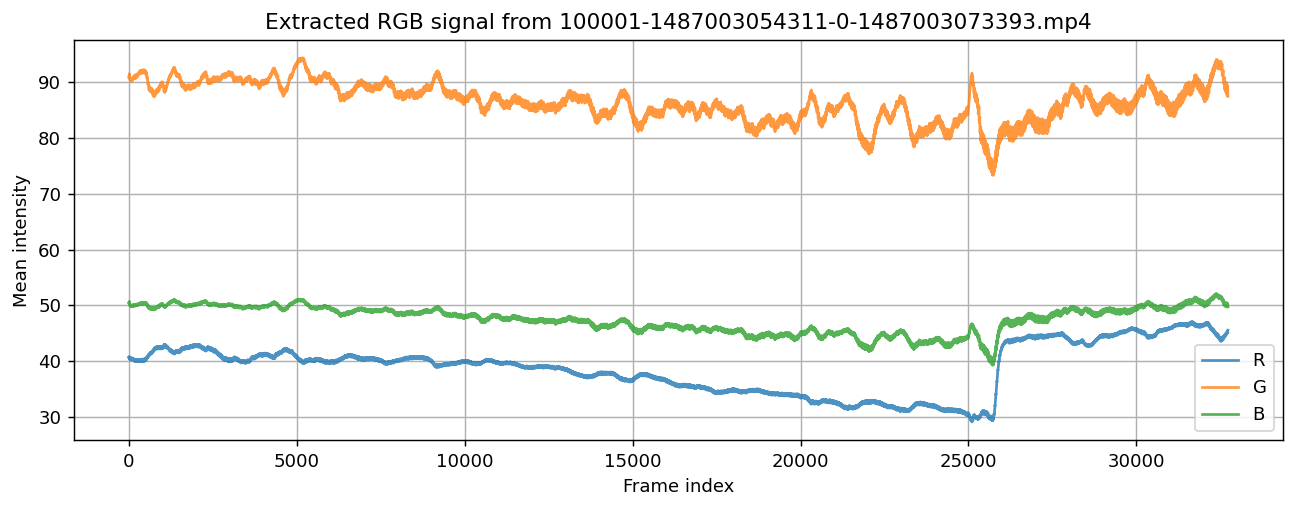

In [34]:
# === Visualization ===
plt.figure(figsize=(12, 4))
plt.plot(rgb_df["R"], label="R", alpha=0.8)
plt.plot(rgb_df["G"], label="G", alpha=0.8)
plt.plot(rgb_df["B"], label="B", alpha=0.8)
plt.title(f"Extracted RGB signal from {video_file.name}")
plt.xlabel("Frame index")
plt.ylabel("Mean intensity")
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# === Batch processing for all videos ===
for f in sorted(data_dir.glob("*.mp4")):
    pid = f.stem
    print(f"🎞 Processing {pid} ...")
    try:
        rgb_means = process_module.getRawRGB(str(f.stem), str(f.parent))
        rgb_df = pd.DataFrame(rgb_means, columns=["R", "G", "B"])
        output_csv = save_dir / f"{pid}.csv"
        rgb_df.to_csv(output_csv, index=False)
        print(f"✅ Saved: {output_csv}")
    except Exception as e:
        print(f"⚠️ Error processing {pid}: {e}")


🎞 Processing 100001-1487003054311-0-1487003073393 ...
processing 100001-1487003054311-0-1487003073393.mp4
✅ Saved: /Users/katyhuang/Desktop/blood-oxygen/spo2-phonecam/spo2-phonecam/external/oximetry-phone-cam-data/data/ppg-csv/100001-1487003054311-0-1487003073393.csv
🎞 Processing 100002-1487006909985-0-1487006910227 ...
processing 100002-1487006909985-0-1487006910227.mp4
✅ Saved: /Users/katyhuang/Desktop/blood-oxygen/spo2-phonecam/spo2-phonecam/external/oximetry-phone-cam-data/data/ppg-csv/100002-1487006909985-0-1487006910227.csv
🎞 Processing 100003-1487010210734-0-1487010211003 ...
processing 100003-1487010210734-0-1487010211003.mp4
✅ Saved: /Users/katyhuang/Desktop/blood-oxygen/spo2-phonecam/spo2-phonecam/external/oximetry-phone-cam-data/data/ppg-csv/100003-1487010210734-0-1487010211003.csv
🎞 Processing 100004-1487016701771-0-1487016702172 ...
processing 100004-1487016701771-0-1487016702172.mp4
✅ Saved: /Users/katyhuang/Desktop/blood-oxygen/spo2-phonecam/spo2-phonecam/external/oximet

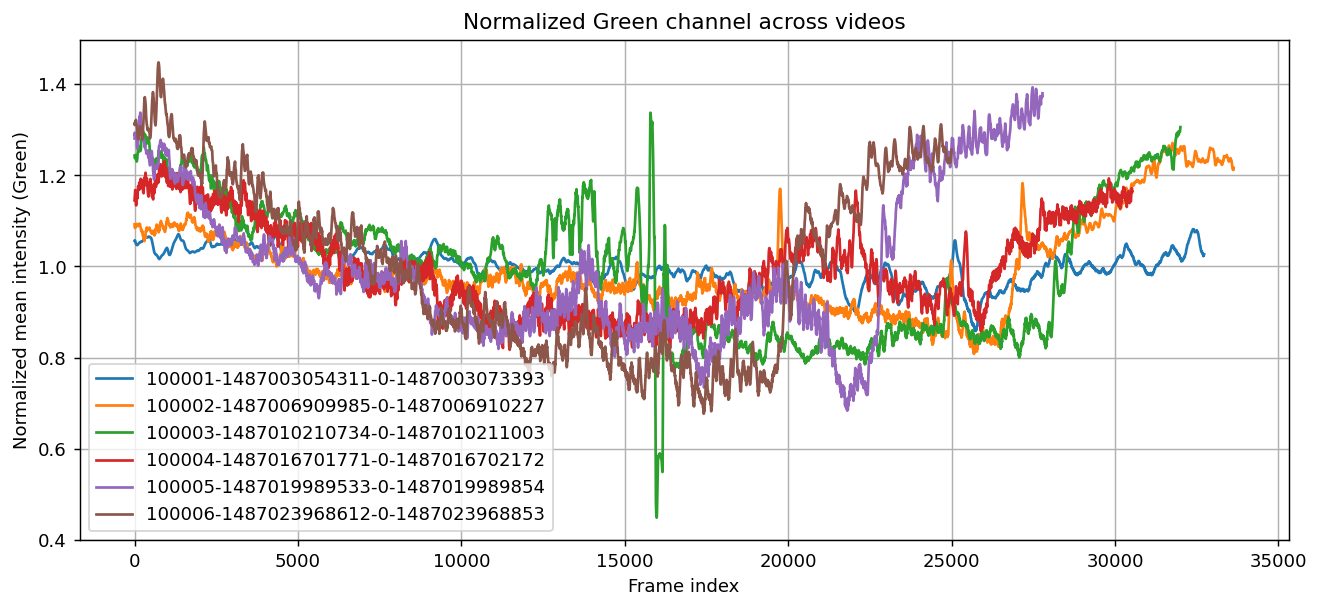

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

save_dir = Path("/Users/katyhuang/Desktop/blood-oxygen/spo2-phonecam/spo2-phonecam/external/oximetry-phone-cam-data/data/ppg-csv")
files = sorted(save_dir.glob("*.csv"))

plt.figure(figsize=(12, 5))
for f in files:
    df = pd.read_csv(f)
    
    # 只看绿色通道
    g = df["G"].to_numpy().astype(float)
    
    # --- Normalize by mean brightness ---
    g_norm = g / np.mean(g)
    
    # --- Smooth (optional) ---
    g_smooth = pd.Series(g_norm).rolling(window=30, min_periods=1, center=True).mean()
    
    plt.plot(g_smooth, label=f.stem)

plt.title("Normalized Green channel across videos")
plt.xlabel("Frame index")
plt.ylabel("Normalized mean intensity (Green)")
plt.legend()
plt.grid(True)
plt.show()
